# Basics of NetworkX

In [5]:
import networkx as nx

# creating a new graph object
G = nx.Graph() #instance

In [6]:
#adding nodes
G.add_node(1) 
G.add_nodes_from([2,3]) #adding nodes from a list
G.add_nodes_from(['u', 'v']) # not necessarily numbers

G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [7]:
#adding individual edges
G.add_edge(1,2) 
G.add_edge('u','v')
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,6)]) #list of tuples

#works even if nodes don't exist
G.add_edge('u', 'w')

G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [8]:
#removing nodes and edges
G.remove_node(2) 
G.nodes()

G.remove_nodes_from([4,5])

G.remove_edge(1,3)
G.remove_edges_from([(1,2), ('u', 'v')])

G.edges()

EdgeView([(1, 6), ('u', 'w')])

In [14]:
# description of the graph
print(G.number_of_nodes())
print(G.number_of_edges())

G.degree()[33] # using the like-dict returned
print(G.degree(33)) # using the method
G.degree(0) is G.degree()[0]

34
78
17


True

# Graph visualization

In [22]:
#use data included in the library
G = nx.karate_club_graph()

import matplotlib.pyplot as plt
%matplotlib inline

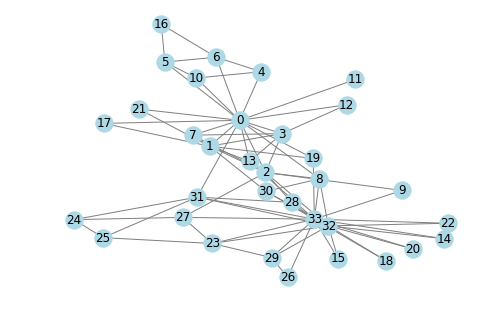

In [23]:
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
#plt.savefig("karate_graph.pdf")
plt.show();

# Random graphs

In [15]:
# random graph (Erdős-Rényi graph)
# for each pair of nodes, p determines the presence or not of an edge
from scipy.stats import bernoulli
bernoulli.rvs(p=.2)

0

In [16]:
def er_graph(N, p):
	"""
	Generate and ER graph.
	"""
	#create empty graph
	G = nx.Graph()
	#add all N nodes in the graph
	G.add_nodes_from(range(N))
	#loop over all pairs of nodes
	for node1 in G.nodes():
	#add an edge with prob p
		for node2 in G.nodes():
			if node1 < node2 and bernoulli.rvs(p=p): # pair considered only once
				G.add_edge(node1, node2)
	return G
			

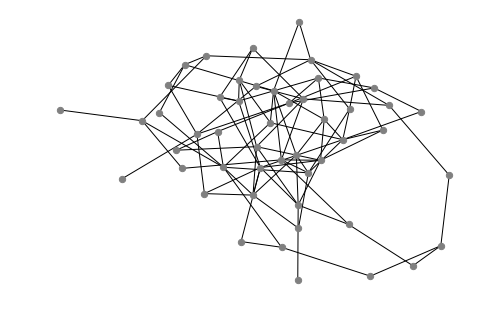

In [17]:
N = 50
p = 0.08
nx.draw(er_graph(N, p), node_size=40, node_color='gray')
#plt.savefig('er1.pdf')
plt.show()

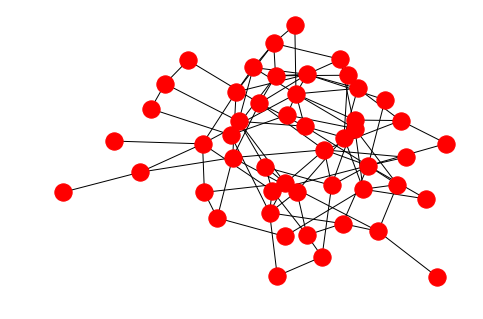

In [19]:
nx.draw(nx.erdos_renyi_graph(50, .08)) # same function

# Plotting the Degree of Distribution

In [20]:
# degree distribution
def plot_degree_distribution(G):
	degree_sequence = [d for n, d in G.degree()]
	plt.hist(degree_sequence, histtype="step")
	plt.xlabel('Degree $k$')
	plt.ylabel('$P(k)$')
	plt.title("Degree distribution")

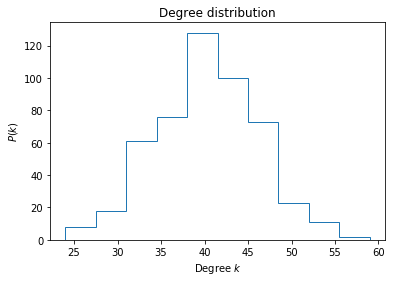

In [21]:
G = er_graph(500, .08)
plot_degree_distribution(G)
#plt.savefig('degree_dist.pdf')
plt.show();

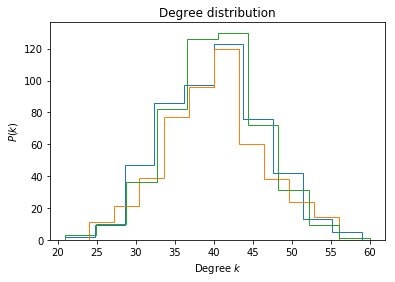

In [24]:
for _ in range(3):
	plot_degree_distribution(er_graph(500, .08))
#plt.savefig('degree_dist_dist.pdf')
plt.show();

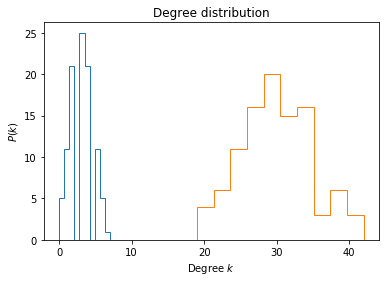

In [27]:
plot_degree_distribution(nx.erdos_renyi_graph(100, 0.03))
plot_degree_distribution(nx.erdos_renyi_graph(100, 0.3))
#The latter distribution has a greater mean on average

# Descriptive statistics of Empirical Social Networks

In [28]:
# descriptive statistics of empirical social networks in 2 Indian villages
# adjacent matrix, value is 1 is adjacent elements are connected
# this kind of matrix is symetrical

import numpy as np
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [29]:
def basic_net_stats(G):
	print(f"Number of nodes: {G.number_of_nodes():d}")
	print(f"Number of edges: {G.number_of_edges():d}")
	degree_sequence = [d for n, d in G.degree()]
	print(f"Average degree: {np.mean(degree_sequence):.2f}")
	
basic_net_stats(G1)
basic_net_stats(G2)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


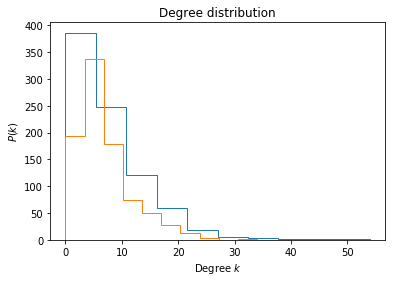

In [30]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
#plt.savefig("villages.pdf")
plt.show();
# ER graphs are not the best model for social networks
# in chich a high number of connections exist

# Finding the largest Connected Component

In [31]:
# finding the largest connected component (LCC)
gen = nx.connected_component_subgraphs(G1) # generator
g = gen.__next__()
type(g)
g.number_of_nodes()
len(gen.__next__()) # size of the next component
len(G1) # same as G1.number_of nodes()
# ATTENTION sequence arbitrary!

843

In [32]:
G1_LCC = max(nx.connected_component_subgraphs(G1), key=len)
	# here max of the size of the graph -> len
G2_LCC = max(nx.connected_component_subgraphs(G2), key=len)
print(G1_LCC.number_of_nodes())
print(G2_LCC.number_of_nodes())

825
810


In [33]:
print(G1_LCC.number_of_nodes() / G1.number_of_nodes())
# ca. 98% of the total nodes are contained in the LCC
print(G2_LCC.number_of_nodes() / G2.number_of_nodes())

0.9786476868327402
0.9236031927023945


c:\program files\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


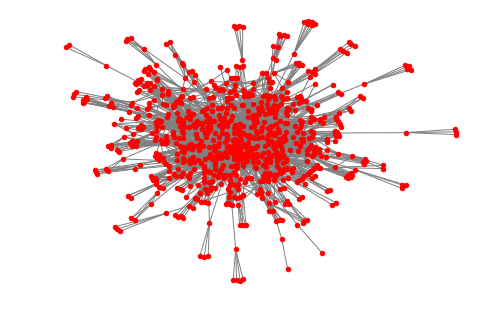

In [34]:
plt.figure()
nx.draw(G1_LCC, node_color='red', edge_color='gray', node_size=20)
#plt.savefig('village1.pdf')
plt.show();

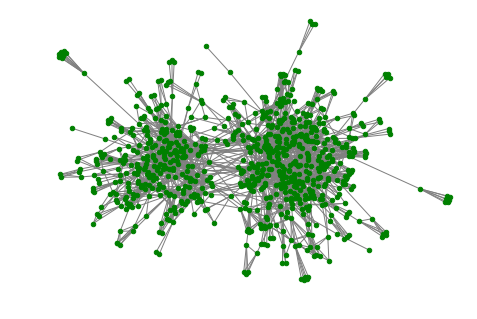

In [35]:
plt.figure()
nx.draw(G2_LCC, node_color='green', edge_color='gray', node_size=20)
#plt.savefig('village2.pdf')
plt.show();
# 2 separate groups = network communities with nodes in each group
# in village 2 densily connected to nodes within the group
# but sparse outside the group